<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP2/MiniP2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Normalizing
'''
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

# Loading MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# chose 10000 simple
X_test = X[60000:]
y_test = y[60000:]

# Scaling
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)

# check normalizting is true!
print("min value:", X_test_scaled.min())
print("max value:", X_test_scaled.max())

min value: 0.0
max value: 1.0


In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
'''
Spliting data
'''
from sklearn.model_selection import train_test_split
X_train, X_test_new, y_train, y_test_new = train_test_split(
    X_test_scaled,
    y_test,
    test_size=0.3,
    random_state=42,
    stratify=y_test
)

# Check shape
print("Shape train data:", X_train.shape)
print("Shape test data:", X_test_new.shape)

Shape train data: (7000, 784)
Shape test data: (3000, 784)


k = 1: accuracy = 0.9507
k = 3: accuracy = 0.9470
k = 5: accuracy = 0.9400
k = 7: accuracy = 0.9363
k = 9: accuracy = 0.9353
k = 11: accuracy = 0.9320
k = 13: accuracy = 0.9313
k = 15: accuracy = 0.9307
k = 17: accuracy = 0.9287
k = 19: accuracy = 0.9260
k = 21: accuracy = 0.9243
k = 23: accuracy = 0.9253
k = 25: accuracy = 0.9200

best value for k: 1 accuracy 0.9507


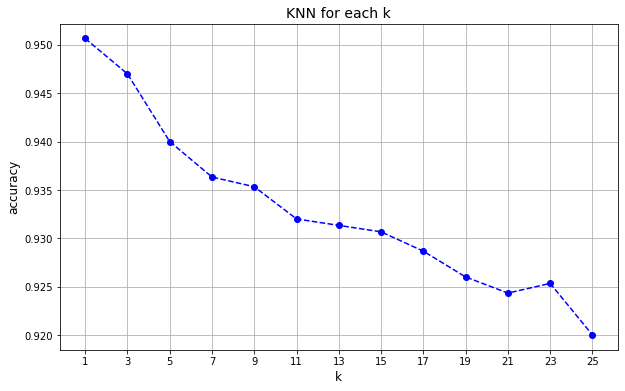

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = list(range(1, 26, 2))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test_new)
    accuracy = accuracy_score(y_test_new, y_pred)
    accuracies.append(accuracy)
    print(f'k = {k}: accuracy = {accuracy:.4f}')

# find best k
best_k = k_values[accuracies.index(max(accuracies))]
print(f'\nbest value for k: {best_k} accuracy {max(accuracies):.4f}')

# plot accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('k', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('KNN for each k', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

Component: 20 | accuracy: 0.9490
Component: 40 | accuracy: 0.9517
Component: 60 | accuracy: 0.9543
Component: 80 | accuracy: 0.9530
Component: 100 | accuracy: 0.9523


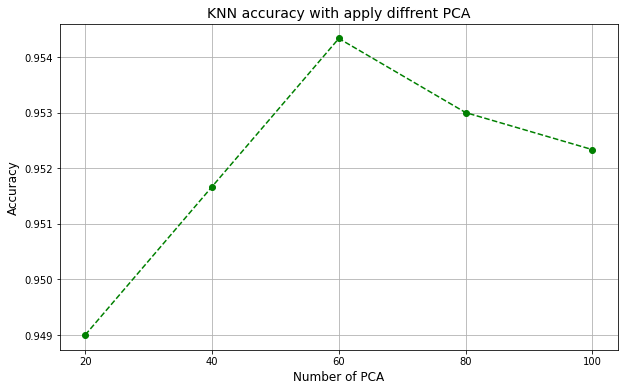

In [ ]:
'''
Apply PCA
'''
from sklearn.decomposition import PCA

components = [20, 40, 60, 80, 100]
accuracies = []

for n in components:
    # PCA dim reduction
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test_new)

    # KNN with k = 3
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    # Calc accuracy
    accuracy = accuracy_score(y_test_new, y_pred)
    accuracies.append(accuracy)
    print(f'Component: {n} | accuracy: {accuracy:.4f}')

# 5. Plot Apply PCA
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', linestyle='--', color='green')
plt.xlabel('Number of PCA', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN accuracy with apply diffrent PCA', fontsize=14)
plt.xticks(components)
plt.grid(True)
plt.show()